In [168]:
import matplotlib.pyplot as plt
import control as ct
from scipy import signal
import numpy as np

fp=[800, 1250] #Banda de Paso [Hz]
fs=[200, 5000] #Banda de Rechazo [Hz]

# def imprimirlista(fList):
#     for k in range(len(fList)):
#         print('Elementos: ', fList[k])
#     return

def calculateAngfreq(fList):
    W= np.full(2, None)
    for i in range(len(fList)):
        W[i]=2*np.pi*fList[i]
    return W

Ap= 0.25 #Atenuacion maxima en Banda de Paso [dB]
As= 30; #Atenuacion minima en Banda de Rechazo [dB]

Wp= calculateAngfreq(fp)
Ws= calculateAngfreq(fs)

## Calculo de FT
n, Wp= signal.cheb1ord(Wp, Ws, Ap, As, 's')
# Obtengo coeficientes del numerador y denominador de la función transferencia.
num, den= signal.cheby1(n, Ap, Wp, 'bandpass', True, 'ba')

# Armo función transferencia
Filtro= ct.tf(num,den)

# Obtengo función transferencia.
print(Filtro)

<TransferFunction>: sys[132]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                     1.642e+07 s^2
--------------------------------------------------------
s^4 + 5080 s^3 + 9.586e+07 s^2 + 2.006e+11 s + 1.559e+15



Grafico la respuesta en frecuencia del filtro

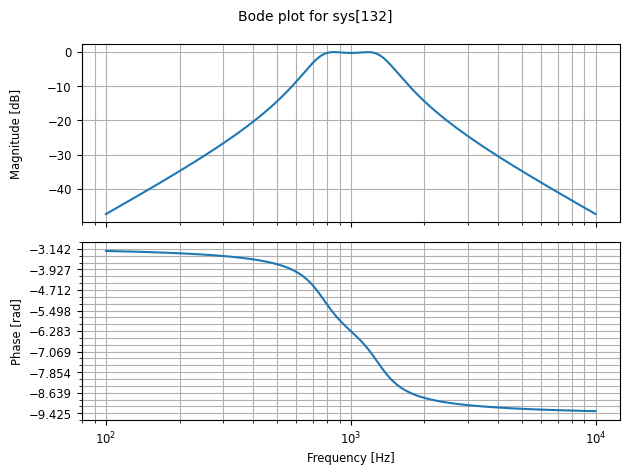

In [169]:
def obtainBode(FT):    
    mag, phase= ct.bode(FT, Hz= True, dB=True, deg= False)
    #plt.savefig('Filtro pasabanda', dpi=600) 
    return

obtainBode(Filtro)

Implemento el filtro pasabanda como un filtro pasa bajo y otro pasaalto.

In [170]:
# Implementación como filtro pasa alto y pasabajo
sos= signal.tf2sos(num, den)
print(sos)
print(sos[0,0])

PasaBajo= ct.tf(2*sos[0,0],[sos[0,3], sos[0,4], sos[0,5]])
print(PasaBajo)
PasaAlto= ct.tf((1/2)*sos[1, 0], [sos[1, 3], sos[1, 4], sos[1, 5]])
print(PasaAlto)

[[1.64208994e+07 0.00000000e+00 0.00000000e+00 1.00000000e+00
  3.18442632e+03 6.63208202e+07]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  1.89557535e+03 2.35000932e+07]]
16420899.350906845
<TransferFunction>: sys[134]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


       3.284e+07
------------------------
s^2 + 3184 s + 6.632e+07

<TransferFunction>: sys[135]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          0.5
-----------------------
s^2 + 1896 s + 2.35e+07

